# Project - Wrangle and Analyze Data |  "WeRateDogs" Twitter data
## Analysis and visualization

In [1]:
# Please also refre to act_report.pdf for deatiled analysis

In [2]:
import requests
import shutil

import pandas as pd
# To print entire frames:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


import numpy as np

import json
#import tweepy

import re

#For Plot
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.despine()

from IPython.display import Image

In [3]:
# Reading CSV file 'twitter_archive_master.csv'
df_master_twitter = pd.read_csv('twitter_archive_master.csv')
df_master_twitter.head(1)

,tweet_id_string,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,timestamp_Year,timestamp_month,timestamp_month_name,stage,tiny_url,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,Aug,unknown_stage,https://t.co/MgUWQ76dJU,8443,38416,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [4]:
df_master_twitter.columns

Index(['tweet_id_string', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'timestamp_Year',
       'timestamp_month', 'timestamp_month_name', 'stage', 'tiny_url',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Statistical analysis

In [5]:
df_master_twitter[['rating_numerator','rating_denominator','retweet_count',
       'favorite_count']].describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1987.000000,1987.0,1987.000000,1987.000000
mean,12.255159,10.0,2680.843986,8780.502768
std,41.541651,0.0,4758.631055,12809.678907
min,1.000000,10.0,12.000000,80.000000
25%,10.000000,10.0,598.000000,1891.500000
50%,11.000000,10.0,1292.000000,3992.000000
75%,12.000000,10.0,3068.500000,11003.000000
max,1776.000000,10.0,84546.000000,164764.000000


### Finding a dog with the highest rating. Usually, dog ratings are more than max-rating 10, outlier rating makes more sense. 

In [6]:
df_master_twitter['rating_numerator'].describe()

count    1987.000000
mean     12.255159  
std      41.541651  
min      1.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [7]:
df_master_twitter[df_master_twitter['rating_numerator'] == 1776]

,tweet_id_string,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,timestamp_Year,timestamp_month,timestamp_month_name,stage,tiny_url,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
723,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,2016,7,Jul,unknown_stage,https://t.co/GRXwMxLBkh,2673,5450,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


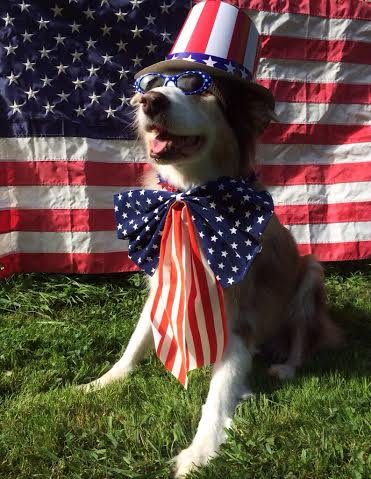

In [8]:
# Picture of highest rated dog
Image(df_master_twitter[df_master_twitter['rating_numerator'] == 1776]['jpg_url'].to_string().split(' ')[-1])

### Finding a dog with the highest retweet. 

In [9]:
df_master_twitter['retweet_count'].describe()

count    1987.000000 
mean     2680.843986 
std      4758.631055 
min      12.000000   
25%      598.000000  
50%      1292.000000 
75%      3068.500000 
max      84546.000000
Name: retweet_count, dtype: float64

In [10]:
df_master_twitter[df_master_twitter['retweet_count'] == 84546]

,tweet_id_string,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,timestamp_Year,timestamp_month,timestamp_month_name,stage,tiny_url,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
771,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,2016,6,Jun,doggo,https://t.co/7wE9LTEXC4,84546,164764,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


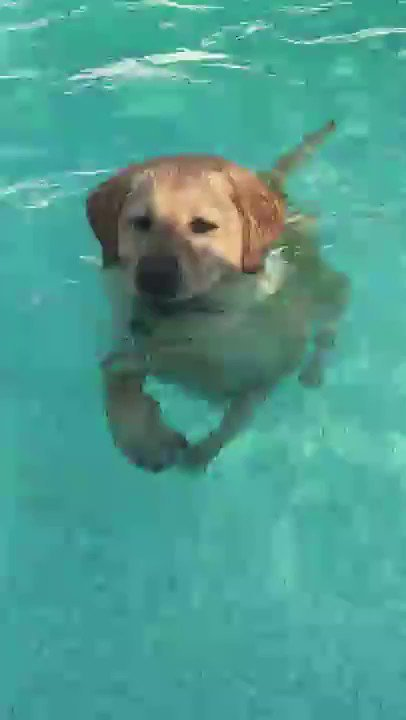

In [11]:
# Picture of dog having highest 'retweet_count'
Image(df_master_twitter[df_master_twitter['retweet_count'] == 84546]['jpg_url'].to_string().split(' ')[-1])

### Finding quantitative distribution of dog stages. 

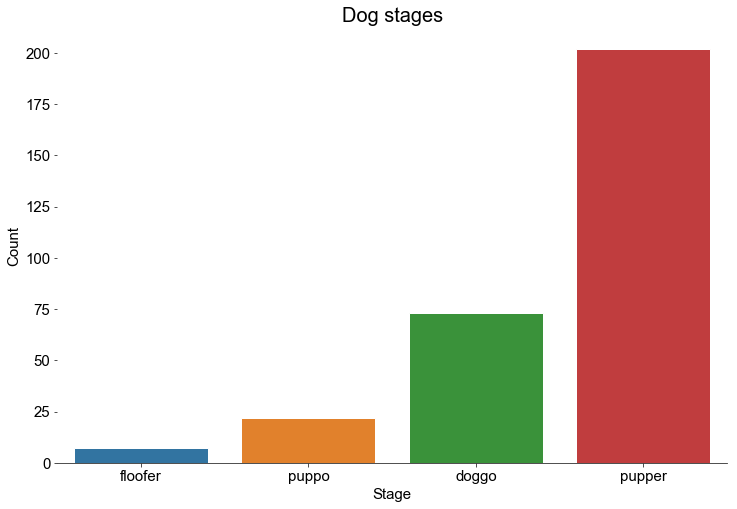

In [12]:
g = sns.countplot('stage',
                  data=df_master_twitter,
                  order=['floofer', 'puppo','doggo','pupper'])

# Set the size of the graph from here
g.figure.set_size_inches(12,8)

# Set the Title of the graph from here
g.axes.set_title('Dog stages', fontsize=20, color='black')


 
# Set the xlabel of the graph 
g.set_xlabel('Stage', size = 15, color="black" )
# Set the ylabel of the graph from here
g.set_ylabel('Count', size = 15, color="black" )


# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=15, labelcolor="black")


# remove the top and right line in graph
sns.despine(left=True)
sns.set_style('whitegrid')
 

plt.savefig('seaborn-countplot-stage.jpg',bbox_inches = 'tight')


### Finding the quantitative distribution of the top ten dog breed when images were ran through  Convolutional Neural Networks and Image Recognition" that can classify breed of dogs. 

#### Finding quantitative distribution of top ten dog breed type as per P1 algorithm. 

In [13]:
# funtion return list of top ten dog breed as per P1 algorithm
def dog_breed(dataframe):
    list_bread_name = []
    for item in dataframe.value_counts().nlargest(10).to_string().split('\n'):
            list_bread_name.append(item.split(" ")[0])
    return list_bread_name
    
    

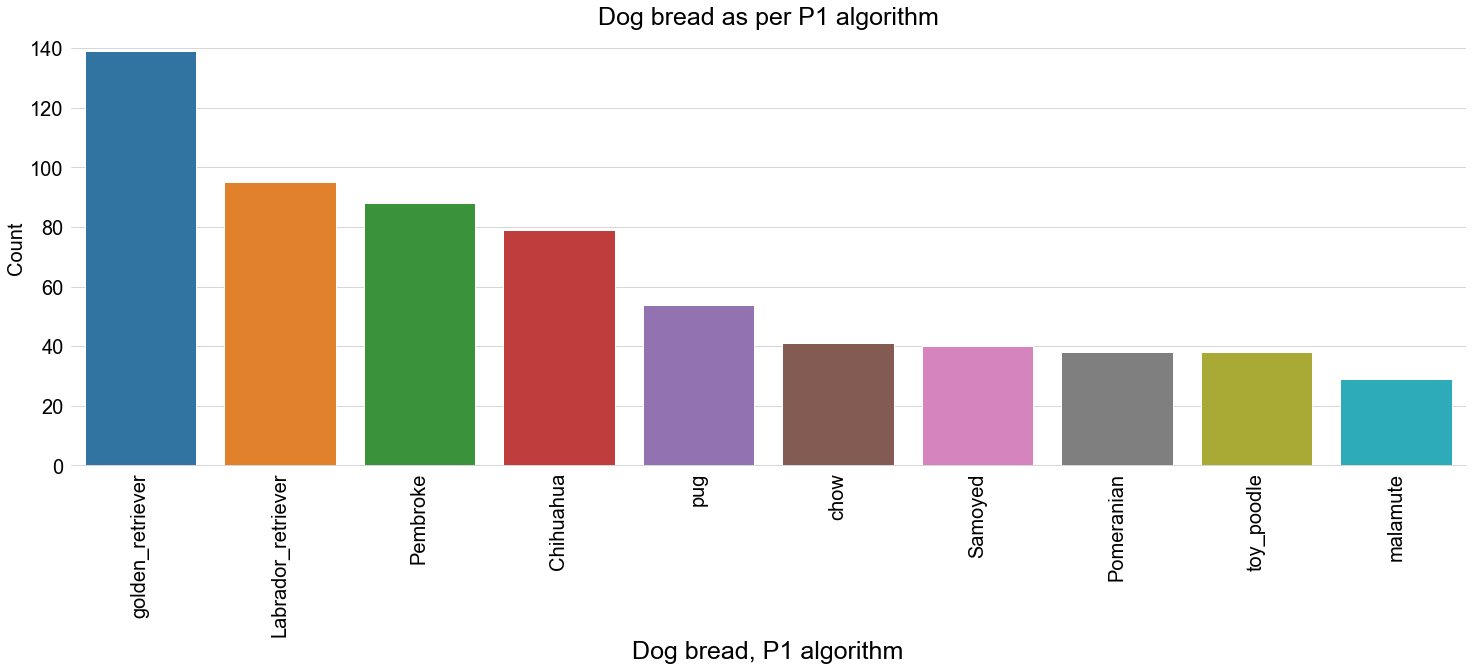

In [14]:
g = sns.countplot('p1',
                  data=df_master_twitter,
                  order=dog_breed(df_master_twitter['p1']))

# Set the size of the graph from here
g.figure.set_size_inches(25,8)

# Set the Title of the graph from here
g.axes.set_title('Dog bread as per P1 algorithm', fontsize=25, color='black')


 
# Set the xlabel of the graph 
g.set_xlabel('Dog bread, P1 algorithm', size = 25, color="black" )
# Set the ylabel of the graph from here
g.set_ylabel('Count', size = 20, color="black" )


# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=20, labelcolor="black")


# remove the top and right line in graph
sns.despine(left=True)
sns.set_style('whitegrid')

#plt.tight_layout()
plt.xticks(rotation=90)

plt.savefig('seaborn-countplot-dogbread-p1.jpg',bbox_inches = 'tight')


#### Finding quantitative distribution of top ten dog breed type as per P2 algorithm. 

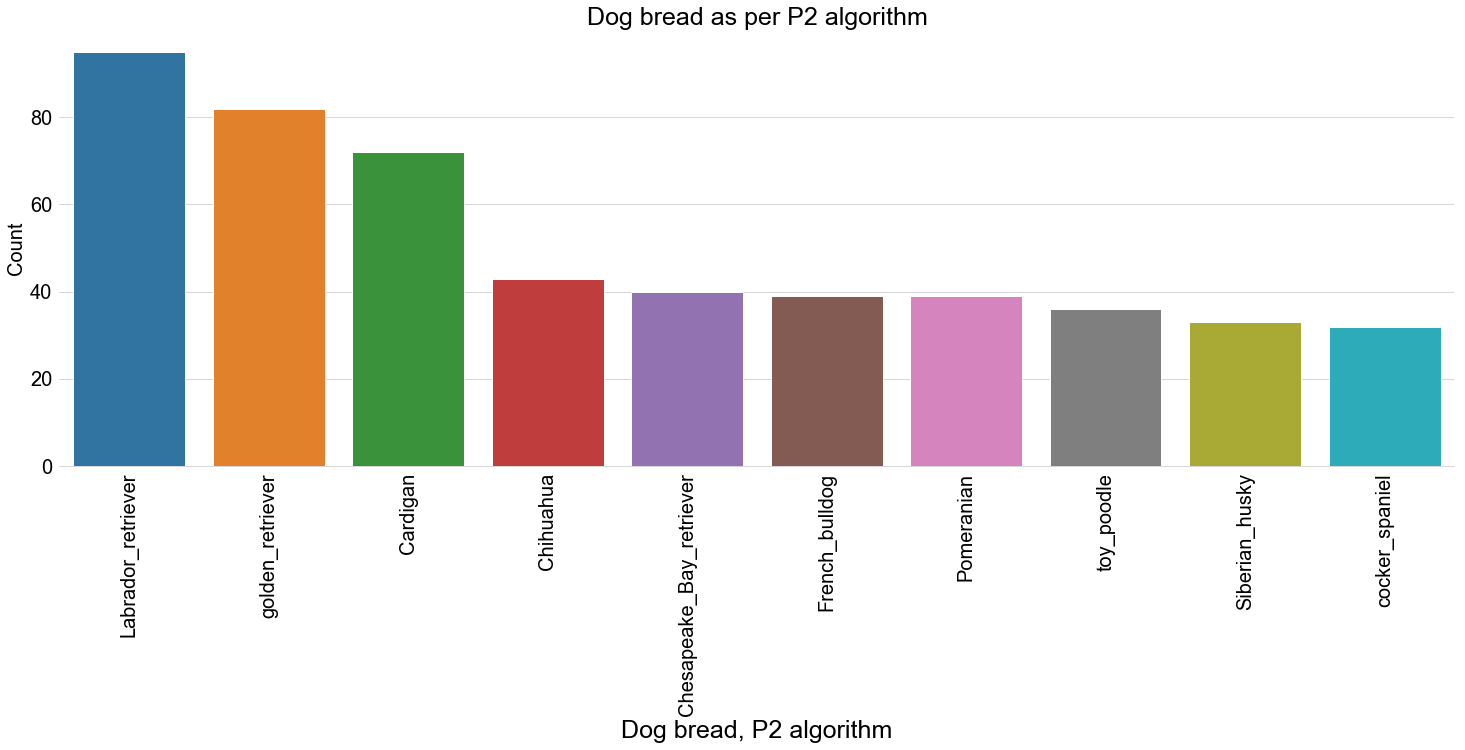

In [15]:
g = sns.countplot('p2',
                  data=df_master_twitter,
                  order=dog_breed(df_master_twitter['p2']))

# Set the size of the graph from here
g.figure.set_size_inches(25,8)

# Set the Title of the graph from here
g.axes.set_title('Dog bread as per P2 algorithm', fontsize=25, color='black')


 
# Set the xlabel of the graph 
g.set_xlabel('Dog bread, P2 algorithm', size = 25, color="black" )
# Set the ylabel of the graph from here
g.set_ylabel('Count', size = 20, color="black" )


# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=20, labelcolor="black")


# remove the top and right line in graph
sns.despine(left=True)
sns.set_style('whitegrid')

#plt.tight_layout()
plt.xticks(rotation=90)

plt.savefig('seaborn-countplot-dogbread-p2.jpg', bbox_inches = 'tight')


#### Finding quantitative distribution of top ten dog breed type as per P3 algorithm. 

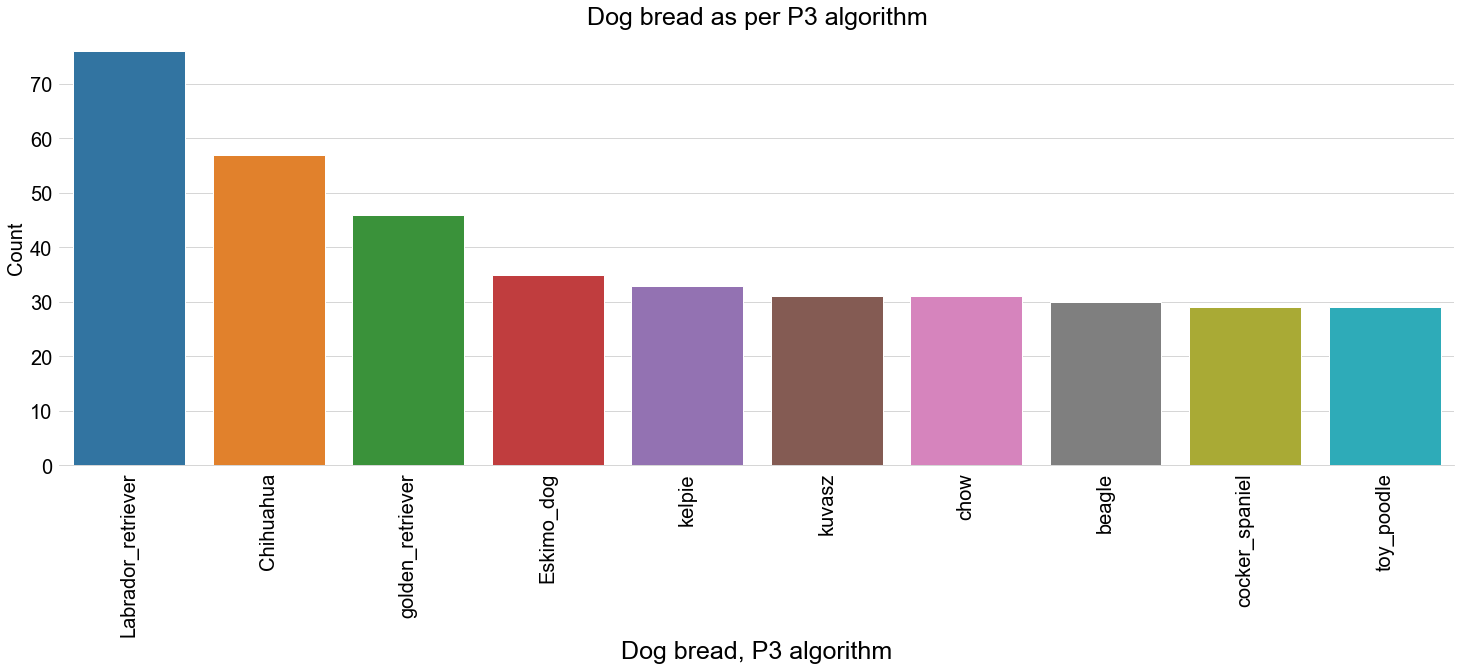

In [16]:
g = sns.countplot('p3',
                  data=df_master_twitter,
                  order=dog_breed(df_master_twitter['p3']))

# Set the size of the graph from here
g.figure.set_size_inches(25,8)

# Set the Title of the graph from here
g.axes.set_title('Dog bread as per P3 algorithm', fontsize=25, color='black')


 
# Set the xlabel of the graph 
g.set_xlabel('Dog bread, P3 algorithm', size = 25, color="black" )
# Set the ylabel of the graph from here
g.set_ylabel('Count', size = 20, color="black" )


# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=20, labelcolor="black")


# remove the top and right line in graph
sns.despine(left=True)
sns.set_style('whitegrid')

#plt.tight_layout()
plt.xticks(rotation=90)

plt.savefig('seaborn-countplot-dogbread-p3.jpg', bbox_inches = 'tight')


### Correlation between 'Retweet count' and 'Favorite count'. 

In [17]:
correlation = df_master_twitter['retweet_count'].corr(df_master_twitter['favorite_count'])
correlation

0.9279522630126017

#### There is strong correlation between 'retweet_count' and 'favorite_count'.

''

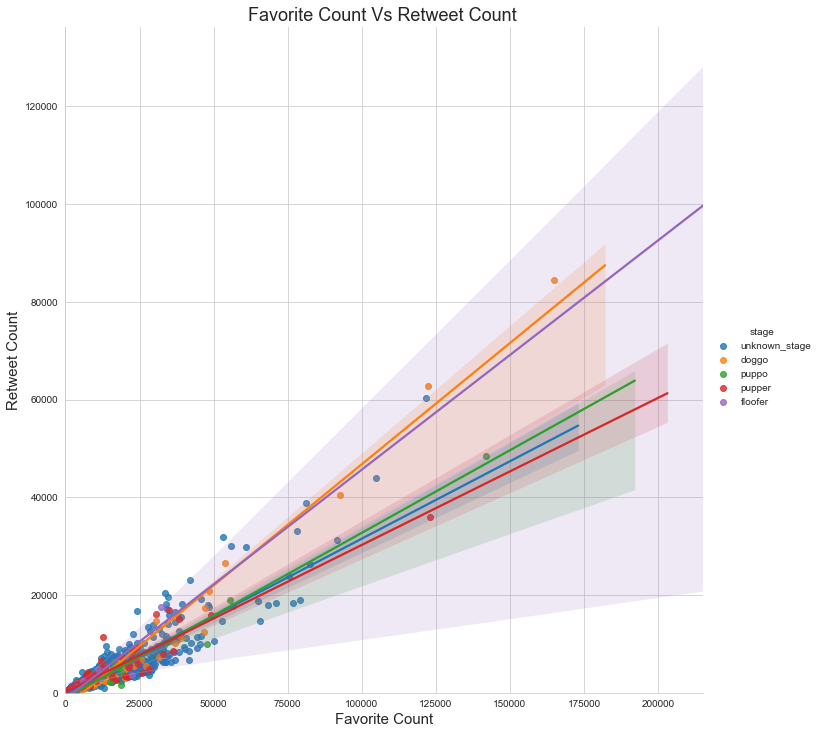

In [18]:
sns.lmplot(x='favorite_count',
          y='retweet_count',
          data=df_master_twitter,
          hue='stage',
          height=10,
          fit_reg=True) 

 
# aligning x-axis and y-axis to origin zero
plt.xlim(xmin=0)
plt.ylim(ymin=0)

# remove the top and right line in graph
sns.despine()
sns.set_style('ticks')
sns.set_style('whitegrid')

plt.title('Favorite Count Vs Retweet Count ', fontsize = 18)
plt.xlabel('Favorite Count', fontsize = 15 )
plt.ylabel('Retweet Count', fontsize = 15);


plt.savefig('seaborn-figure-lmplot.jpg', bbox_inches = 'tight')
;

''

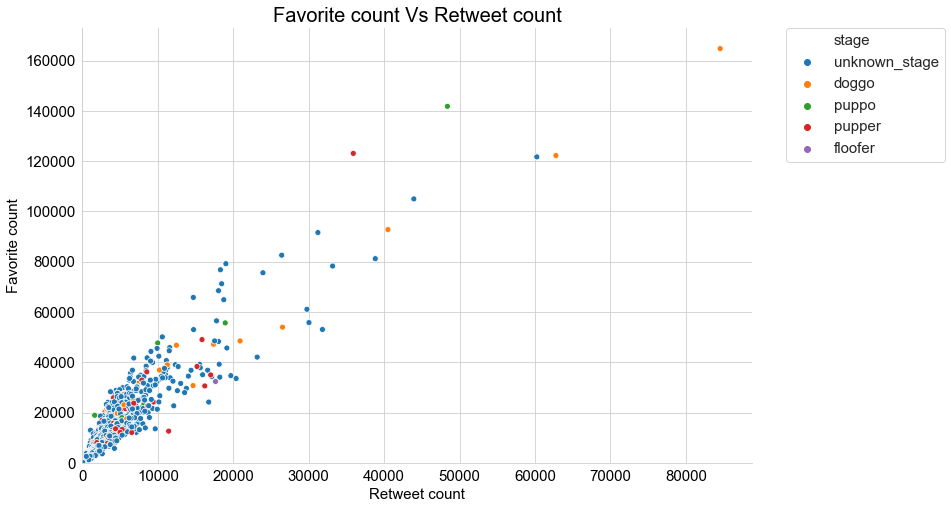

In [19]:

g = sns.scatterplot(x='retweet_count',
                y='favorite_count',
                data=df_master_twitter,
                hue='stage')


# Set the size of the graph from here
g.figure.set_size_inches(12,8)


# Set the Title of the graph from here
g.axes.set_title('Favorite count Vs Retweet count', fontsize=20, color='black')

# Set the xlabel of the graph from here
g.set_xlabel('Retweet count', size = 15, color="black" )
# Set the ylabel of the graph from here
g.set_ylabel('Favorite count', size = 15, color="black" )

# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=15, labelcolor="black")

# aligning x-axis and y-axis to origin zero
plt.xlim(xmin=0)
plt.ylim(ymin=0)

# remove the top and right line in graph
sns.despine()
sns.set_style('ticks')
sns.set_style('whitegrid')

 

# Moving legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 15, borderaxespad=0.)

plt.savefig('seaborn-figure.jpg', bbox_inches = 'tight')

;

#### Visualizing dog stage having the highest favorite count.

In [20]:
df_master_twitter_groupby = df_master_twitter.groupby('stage', as_index=False).agg({'favorite_count': 'sum'})
df_master_twitter_groupby.sort_values(by=['favorite_count'])

,stage,favorite_count
1,floofer,89580
3,puppo,484136
0,doggo,1404017
2,pupper,1425920
4,unknown_stage,14043206


In [21]:
list_stage = []
for item in df_master_twitter_groupby.stage:
    list_stage.append(item)

print(list_stage)

['doggo', 'floofer', 'pupper', 'puppo', 'unknown_stage']


''

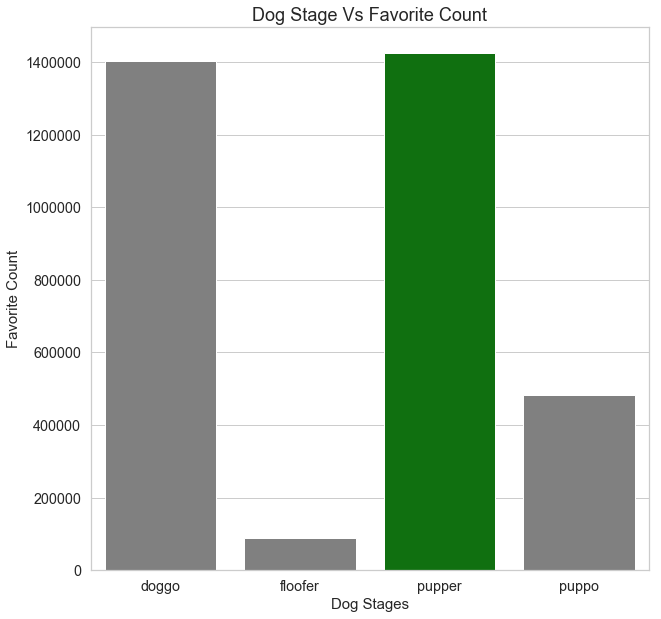

In [22]:
plt.figure(figsize=(10,10))
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

values = list(df_master_twitter_groupby.favorite_count)[:4]
colors = ['grey' if (x < max(values)) else 'green' for x in values ]

sns.barplot(x='stage',
            y='favorite_count',
            data=df_master_twitter_groupby, ci=None,
            palette=colors,
            order=['doggo', 'floofer', 'pupper', 'puppo']);

plt.title('Dog Stage Vs Favorite Count', fontsize = 18)
plt.xlabel('Dog Stages', fontsize = 15 )
plt.ylabel('Favorite Count', fontsize = 15)

plt.savefig('seaborn-barplot-stage-favorite-count.jpg', bbox_inches = 'tight')
;

#### Visualizing top ten dog names.

In [23]:
df_master_twitter.name.value_counts().nlargest(11)

None       582
Oliver     12 
Charlie    10 
Lucy       10 
Cooper     10 
Tucker     9  
Penny      9  
Daisy      8  
Sadie      8  
Stanley    7  
Lola       7  
Name: name, dtype: int64

In [24]:
list_name = []
for item in df_master_twitter.name.value_counts().nlargest(11).to_string().split('\n'):
    if 'None' not in item.split(" "):
        list_name.append(item.split(" ")[0])

print(list_name)
    
    

['Oliver', 'Charlie', 'Lucy', 'Cooper', 'Tucker', 'Penny', 'Daisy', 'Sadie', 'Stanley', 'Lola']


In [25]:
list(df_master_twitter.name.value_counts().nlargest(11))[1:]

[12, 10, 10, 10, 9, 9, 8, 8, 7, 7]

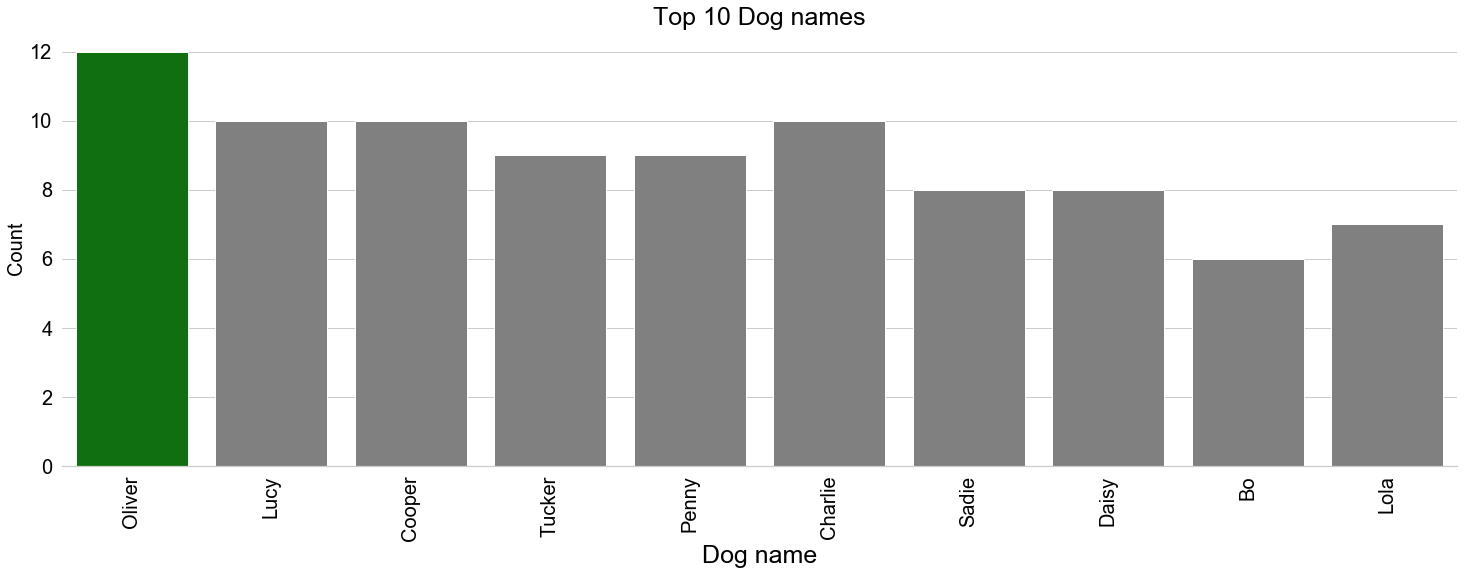

In [26]:

values = list(df_master_twitter.name.value_counts().nlargest(11))[1:]
colors = ['grey' if (x < max(values)) else 'green' for x in values ]

g = sns.countplot('name',
                  data=df_master_twitter,
                  palette=colors,
                  order=['Oliver', 'Lucy', 'Cooper', 'Tucker', 'Penny', 'Charlie', 'Sadie', 'Daisy', 'Bo', 'Lola'])

# Set the size of the graph from here
g.figure.set_size_inches(25,8)

# Set the Title of the graph from here
g.axes.set_title('Top 10 Dog names', fontsize=25, color='black')


 
# Set the xlabel of the graph 
g.set_xlabel('Dog name', size = 25, color="black" )
# Set the ylabel of the graph from here
g.set_ylabel('Count', size = 20, color="black" )


# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=20, labelcolor="black")


# remove the top and right line in graph
sns.despine(left=True)
sns.set_style('whitegrid')

#plt.tight_layout()
plt.xticks(rotation=90)

plt.savefig('seaborn-countplot-name.jpg', bbox_inches = 'tight')


### Finding the quantitative distribution of "time of engagement"  for  Twitter followers with   Twitter account WeRateDogs. 

In [27]:
# converting column 'timestamp' to datatime type
df_master_twitter['timestamp'] = pd.to_datetime(df_master_twitter['timestamp'])

In [28]:
# function to convert 'timestamp' into am/pm format and adding a new column 'timestamp_am_pm'
def time_am_pm(row):
    var_01 = row.strftime('%r')
    var_02 = var_01.split(':')
    ampm = var_02[2].split(' ')[1]
    return var_02[0] + ampm
     
df_master_twitter['timestamp_am_pm'] = df_master_twitter['timestamp'].apply(time_am_pm)    

''

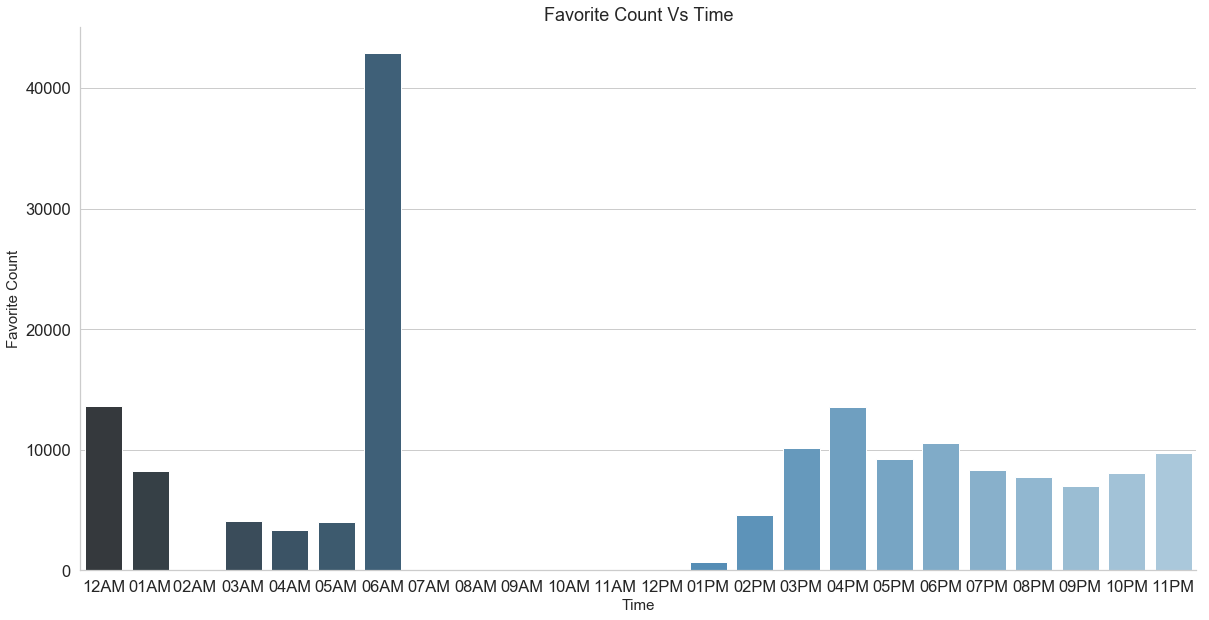

In [29]:
plt.figure(figsize=(20,10))

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

order = ['12AM', '01AM', '02AM ', '03AM', '04AM', '05AM', '06AM', '07AM', '08AM', '09AM', '10AM', '11AM', '12PM', '01PM', '02PM', '03PM', '04PM', '05PM', '06PM', '07PM', '08PM',  '09PM',  '10PM', '11PM']
sns.barplot(x='timestamp_am_pm',
            y = 'favorite_count',
            data=df_master_twitter, ci=None,
            palette="Blues_d",
            order=order)

plt.title('Favorite Count Vs Time', fontsize = 18)
plt.xlabel('Time', fontsize = 15 )
plt.ylabel('Favorite Count', fontsize = 15)


sns.despine()


plt.savefig('seaborn-barplot-time.jpg', bbox_inches = 'tight')

;

''

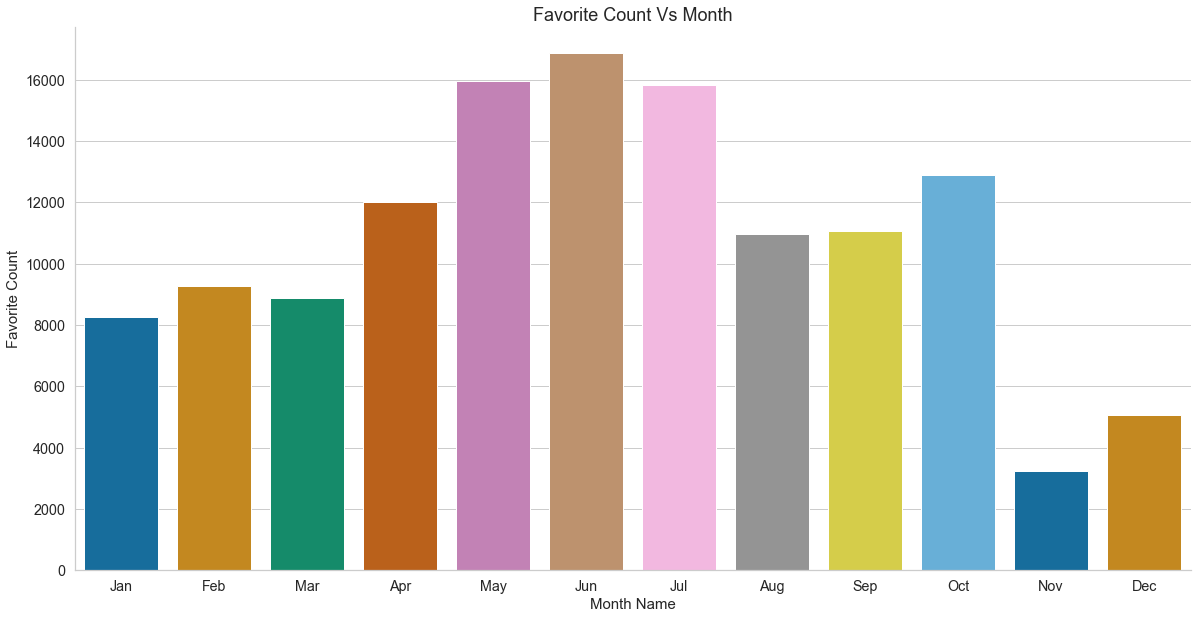

In [32]:
plt.figure(figsize=(20,10))

sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
sns.barplot(x='timestamp_month_name',
            y = 'favorite_count',
            data=df_master_twitter, ci=None,
            palette="colorblind",
            order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] )

plt.title('Favorite Count Vs Month', fontsize = 18)
plt.xlabel('Month Name', fontsize = 15 )
plt.ylabel('Favorite Count', fontsize = 15)

sns.despine()


plt.savefig('seaborn-barplot-month.jpg', bbox_inches = 'tight')


;

### Reference

- https://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook/32370538
- https://matplotlib.org/gallery/ticks_and_spines/ticklabels_rotation.html
- https://matplotlib.org/examples/ticks_and_spines/ticklabels_demo_rotation.html
- http://gree2.github.io/python/2015/05/05/python-seaborn-tutorial-controlling-figure-aesthetics